In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE, SMOTENC
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = r"/content/Company_Data.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
num_bins = 4
data['Sales_Category'] = pd.qcut(data['Sales'], q=num_bins, labels=False)

In [ ]:
labels = ['Very Low', 'Low', 'Moderate', 'High']
data['Sales_Category'] = data['Sales_Category'].map(dict(enumerate(labels)))

In [ ]:
X = data.drop(['Sales', 'Sales_Category'], axis=1)
y = data['Sales_Category']

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
precision_gini = metrics.precision_score(y_test, y_pred_gini, average='weighted')
recall_gini = metrics.recall_score(y_test, y_pred_gini, average='weighted')
f1_score_gini = metrics.f1_score(y_test, y_pred_gini, average='weighted')

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = metrics.accuracy_score(y_test, y_pred_entropy)
precision_entropy = metrics.precision_score(y_test, y_pred_entropy, average='weighted')
recall_entropy = metrics.recall_score(y_test, y_pred_entropy, average='weighted')
f1_score_entropy = metrics.f1_score(y_test, y_pred_entropy, average='weighted')

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
pruned_clf = DecisionTreeClassifier(**best_params, random_state=42)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [ ]:
y_pred_pruned = pruned_clf.predict(X_test)
accuracy_pruned = metrics.accuracy_score(y_test, y_pred_pruned)
precision_pruned = metrics.precision_score(y_test, y_pred_pruned, average='weighted')
recall_pruned = metrics.recall_score(y_test, y_pred_pruned, average='weighted')
f1_score_pruned = metrics.f1_score(y_test, y_pred_pruned, average='weighted')

In [ ]:
smote = SMOTENC(categorical_features=[7, 8], random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, val_index in kf.split(X_encoded):
    X_train_fold, X_val = X_encoded.iloc[train_index], X_encoded.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]


    clf_fold = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf_fold.predict(X_val)
    accuracy_fold = metrics.accuracy_score(y_val, y_pred_fold)
    precision_fold = metrics.precision_score(y_val, y_pred_fold, average='weighted')
    recall_fold = metrics.recall_score(y_val, y_pred_fold, average='weighted')
    f1_score_fold = metrics.f1_score(y_val, y_pred_fold, average='weighted')

    accuracies.append(accuracy_fold)
    precisions.append(precision_fold)
    recalls.append(recall_fold)
    f1_scores.append(f1_score_fold)

In [ ]:
print("Gini-based Decision Tree Classifier:")
print("Accuracy:", accuracy_gini)
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1_score_gini)
print()

Gini-based Decision Tree Classifier:
Accuracy: 0.325
Precision: 0.3446139021796917
Recall: 0.325
F1 Score: 0.3314588652682363



In [ ]:
print("Entropy-based Decision Tree Classifier:")
print("Accuracy:", accuracy_entropy)
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1 Score:", f1_score_entropy)
print()

Entropy-based Decision Tree Classifier:
Accuracy: 0.3875
Precision: 0.3918560606060606
Recall: 0.3875
F1 Score: 0.38918546365914786



In [ ]:
print("Pruned Decision Tree Classifier:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_pruned)
print("Precision:", precision_pruned)
print("Recall:", recall_pruned)
print("F1 Score:", f1_score_pruned)
print()

Pruned Decision Tree Classifier:
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9}
Accuracy: 0.425
Precision: 0.4360726544622426
Recall: 0.425
F1 Score: 0.4292618621688389



In [ ]:
print("K-Fold Cross-Validation Results:")
print("Average Accuracy:", np.mean(accuracies))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1 Score:", np.mean(f1_scores))
print()

K-Fold Cross-Validation Results:
Average Accuracy: 0.4225
Average Precision: 0.44581491431591547
Average Recall: 0.4225
Average F1 Score: 0.4266632993516339



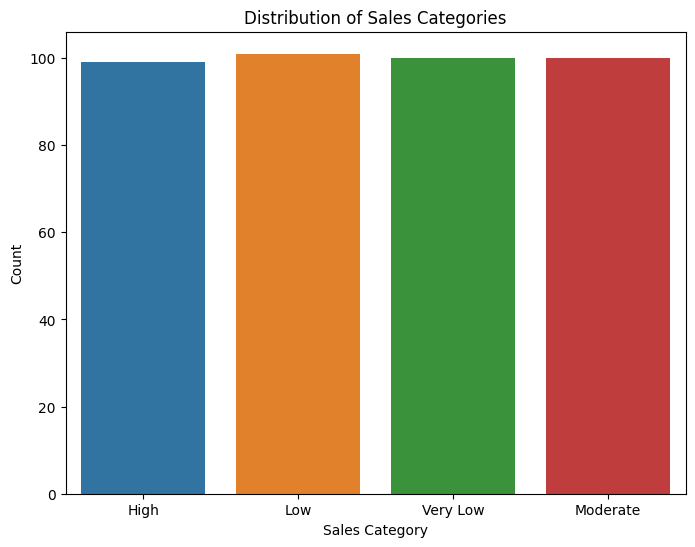

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sales_Category', data=data)
plt.xlabel('Sales Category')
plt.ylabel('Count')
plt.title('Distribution of Sales Categories')
plt.show()

<ipython-input-89-1c3adbea2e1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


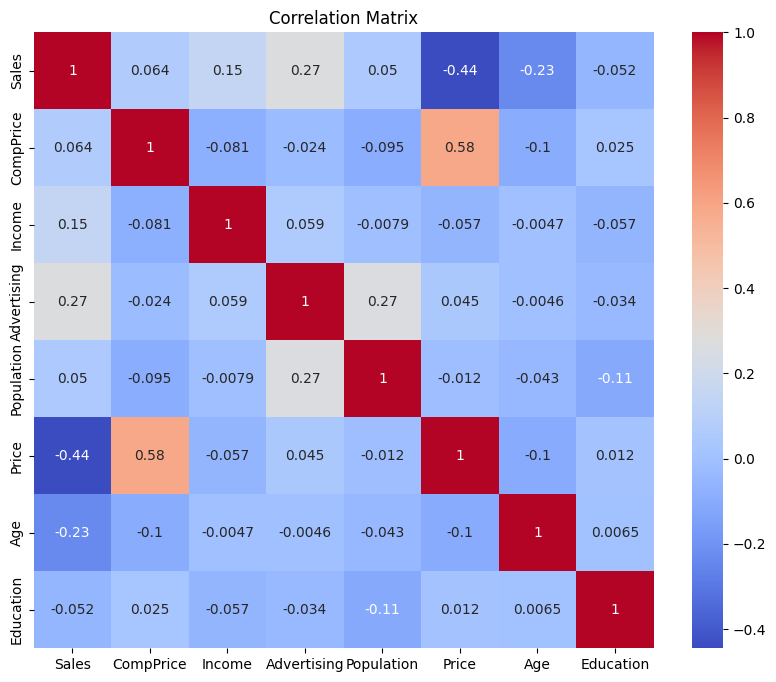

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

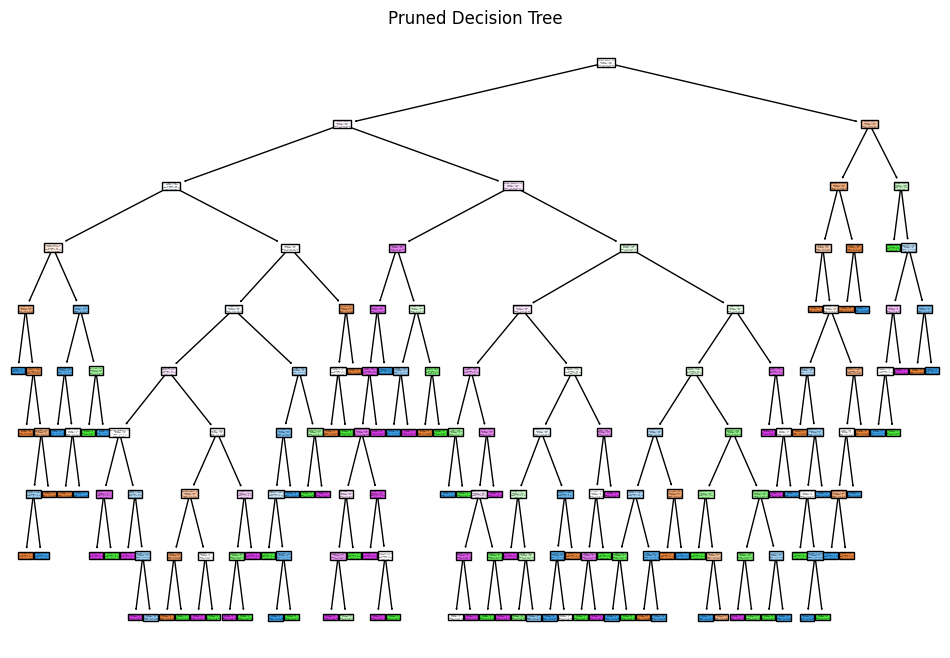

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(pruned_clf, feature_names=X_encoded.columns, class_names=labels, filled=True)
plt.title('Pruned Decision Tree')
plt.show()

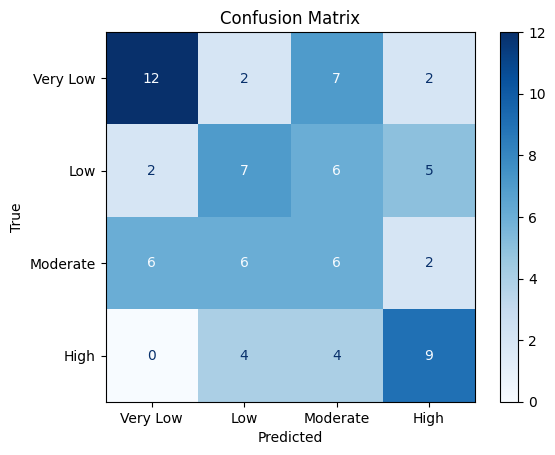

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_pruned)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()